In [1]:
# testing BayLIME on images
# based on https://github.com/x-y-zhao/BayLime/blob/master/BayLIME_tutorial_images.ipynb
# Tatsuo Okubo
# 2021/10/10

In [27]:
import os
import sys

cwd = os.getcwd()
sys.path.append(cwd + '/../BayLime/lime')

from lime import lime_image

In [24]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_ubyte
import tensorflow as tf
from tensorflow import keras

In [8]:
from keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions
from keras.preprocessing import image

In [9]:
tf.__version__

'2.4.1'

In [10]:
keras.__version__

'2.4.0'

In [11]:
inet_model = InceptionV3(weights="imagenet")  # load weights from a model pre-trained on ImageNet

In [12]:
def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        img = image.load_img(img_path, target_size=(299, 299))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        out.append(x)
    return np.vstack(out)

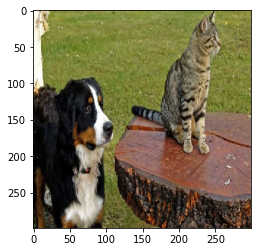

('n02107683', 'Bernese_mountain_dog', 0.68255985)
('n02107908', 'Appenzeller', 0.03793869)
('n02108000', 'EntleBucher', 0.0154116405)
('n02107574', 'Greater_Swiss_Mountain_dog', 0.014435474)
('n02102040', 'English_springer', 0.0015393278)


In [15]:
images = transform_img_fn([os.path.join('..', 'BayLime', 'data','dogs.jpg')])
plt.imshow(images[0] / 2 + 0.5)
plt.show()
preds = inet_model.predict(images)
for x in decode_predictions(preds)[0]:
    print(x)

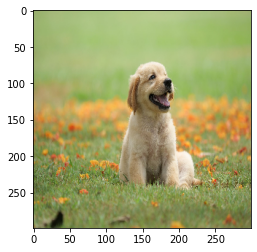

('n02099601', 'golden_retriever', 0.7591782)
('n02099712', 'Labrador_retriever', 0.1324828)
('n02102318', 'cocker_spaniel', 0.015282997)
('n02101556', 'clumber', 0.014689422)
('n02104029', 'kuvasz', 0.0038136705)


In [17]:
images = transform_img_fn([os.path.join('..', 'BayLime', 'data','5.jpg')])
plt.imshow(images[0] / 2 + 0.5)
plt.show()
preds = inet_model.predict(images)
for x in decode_predictions(preds)[0]:
    print(x)

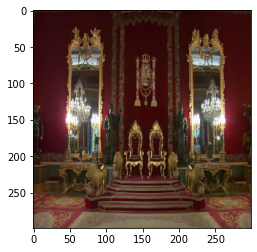

('n04429376', 'throne', 0.94833046)
('n02699494', 'altar', 0.0037875504)
('n03028079', 'church', 0.0036688533)
('n02791124', 'barber_chair', 0.0034186435)
('n02791270', 'barbershop', 0.0019843138)


In [18]:
images = transform_img_fn([os.path.join('..', 'BayLime', 'data','throne.jpg')])
plt.imshow(images[0] / 2 + 0.5)
plt.show()
preds = inet_model.predict(images)
for x in decode_predictions(preds)[0]:
    print(x)

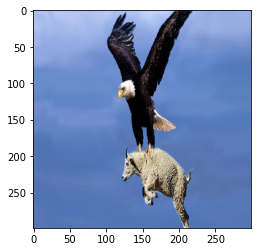

('n01614925', 'bald_eagle', 0.5944293)
('n01608432', 'kite', 0.02128787)
('n02106166', 'Border_collie', 0.004580052)
('n03937543', 'pill_bottle', 0.0029079646)
('n02105412', 'kelpie', 0.002181252)


In [35]:
images = transform_img_fn([os.path.join('..', 'BayLime', 'data','eagle_sheep.jpg')])
plt.imshow(images[0] / 2 + 0.5)
plt.show()
preds = inet_model.predict(images)
for x in decode_predictions(preds)[0]:
    print(x)

In [22]:
def predict_fn(images):
    return session.run(probabilities, feed_dict={processed_images: images})

In [37]:
explainer = lime_image.LimeImageExplainer(feature_selection='none')#kernel_width=0.1
explanation = explainer.explain_instance(images[0], inet_model.predict,
                                         top_labels=3, hide_color=0, batch_size=10,
                                         num_samples=200, model_regressor='non_Bay')

ValueError: Buffer dtype mismatch, expected 'double' but got 'float'